# Exploring Public Sentiment on Twitter: An NLP Approach

- os: A module for interacting with the operating system, facilitating file and directory manipulation.
re: A module for processing strings using regular expressions.
- pandas: A library for data manipulation and analysis that uses robust data structures.
- numpy: A library for numerical operations, especially on large arrays and matrices.
- seaborn: A library for creating informative and attractive statistical visualizations.
- matplotlib: A library for creating static, animated, or interactive visualizations.
- nltk: The Natural Language Toolkit library containing a set of libraries and programs for symbolic and statistical natural language processing (NLP) of the English language.
- sklearn: A machine learning library featuring various algorithms and tools.
- plotly_express: A high-level interface for drawing attractive and informative graphics using the Plotly library.
-genesis: A library for topic modeling and document similarity analysis.
- pyLDAvis: A Python library for interactive topic model visualization. It can be used in conjunction with a variety of topic modeling packages.
- wordcloud: A library for generating word clouds.
- nbconvert: A tool for converting Jupyter notebooks to HTML, LaTeX, PDF, Markdown, and more

#### Data Description
- Data Source [https://www.kaggle.com/datasets/gpreda/covid19-tweets]

> Data Description
> The dataset consists of the following columns:
- user_name: The Twitter user posting the tweet.
- user_location: The location provided by the user in their Twitter profile.
- user_description: The self-description provided by the Twitter user in their profile.
- user_created: The date and time of when the user’s Twitter account was created.
- user_followers: The number of followers of the Twitter user.
- user_friends: The number of other Twitter users that the user follows.
- user_favourites: The number of tweets marked by the user as their favorites.
- user_verified: This indicates if Twitter has verified the user’s account.
- date: The date and time of when the tweet was posted.
- text: The content of the tweet.
- hashtags: The hashtags used in the tweet.
- source: The device or application used to post the tweet.
- is_retweet: This indicates if the tweet is a retweet of another user’s tweet.
- language: The identified language of the tweet.
- lat: The latitude coordinate of the location from which the tweet is posted, if available.
- long: The longitude coordinate of the location from which the tweet is posted, if available.
- country: The country from where the tweet is posted, if available.``


## Part 1: Setting Up

In [12]:
# Importing InteractiveShell from IPython.core.interactiveshell module
from IPython.core.interactiveshell import InteractiveShell

# Setting the ast_node_interactivity option of InteractiveShell to "all"
# This allows IPython to display results for all statements in a code cell
# rather than just the last one, which is the default behavior.
InteractiveShell.ast_node_interactivity = "all"

import warnings
import matplotlib

# Suppress the specific MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=matplotlib.cbook.MatplotlibDeprecationWarning)

### Task 1: Import the Libraries

In [13]:
import os  
import re 
import pandas as pd  
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import plotly_express as px
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
from wordcloud import WordCloud
import nbconvert

## Part 2: Data Collection and Preprocessing

### Task 2: Load the Dataset and Have a First Look

##### Load the CSV into a variable named `df_twitter`

In [14]:
df_twitter = pd.read_csv('./usercode/covid19_twitter_dataset.csv', index_col=0)

##### Display the DataFrame along with the row count

In [15]:

print(df_twitter.shape)
df_twitter.head()

(111973, 17)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,lat,long,country
0,Tom Basile 🇺🇸,"new york, ny","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,en,40.712728,-74.006015,United States
1,Time4fisticuffs,"pewee valley, ky",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,en,38.310625,-85.487459,United States
2,DIPR-J&K,jammu and kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,en,33.664930,75.162958,India
3,🎹 Franz Schubert,новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,en,43.341088,132.625674,Россия
5,Creativegms,"dhaka,bangladesh","I'm Motalib Mia, Logo -Logo Designer - Brandin...",2020-01-12 09:03:01,241,1694,8443,False,2020-07-25 12:26:50,Order here: https://t.co/4NUrGX6EmA\n\n#logo #...,"['logo', 'graphicdesigner', 'logodesign', 'log...",Twitter Web App,False,en,23.764402,90.389015,বাংলাদেশ


##### Show the tweet count for the top 10 countries

In [16]:
df_twitter['country'].value_counts()[:10]

United States     41931
India             19473
United Kingdom    11544
Canada             6679
Australia          4370
Nigeria            2632
South Africa       2415
Éire / Ireland     1545
Kenya              1493
中国                 1141
Name: country, dtype: int64

##### Plot the top 20 users who post the most

<Axes: >

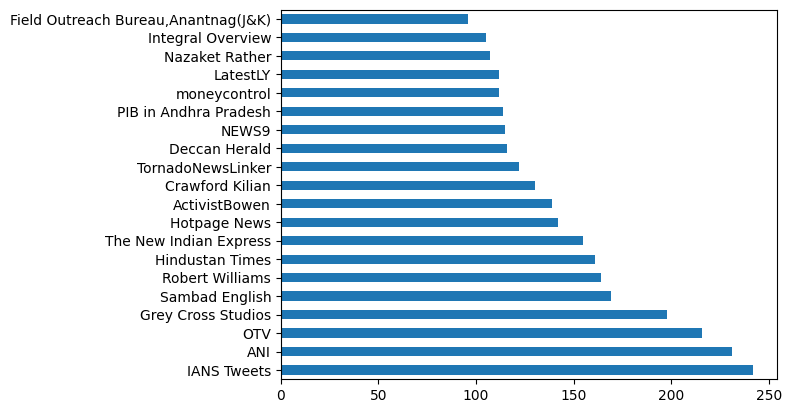

In [17]:
df_twitter['user_name'].value_counts()[:20].plot(kind='barh')

### Task 3: Basic Text Preprocessing

##### Remove unnecessary columns for the analysis

In [18]:
df_twitter.drop(['user_description','user_created','user_favourites','language'], axis=1, inplace=True)

##### Check for missing values and handle them

In [19]:
df_twitter.isnull().sum() # to check for missing values


user_name             0
user_location         0
user_followers        0
user_friends          0
user_verified         0
date                  0
text                  0
hashtags          32184
source                0
is_retweet            0
lat                   0
long                  0
country               0
dtype: int64

In [20]:
# Fill missing values in 'hashtags' with an empty list
df_twitter['hashtags'].fillna("[]", inplace=True)
df_twitter.isnull().sum() # to check for missing values



user_name         0
user_location     0
user_followers    0
user_friends      0
user_verified     0
date              0
text              0
hashtags          0
source            0
is_retweet        0
lat               0
long              0
country           0
dtype: int64

In [21]:
df_twitter['hashtags'].head()

0                                                   []
1                                          ['COVID19']
2                    ['CoronaVirusUpdates', 'COVID19']
3                           ['coronavirus', 'covid19']
5    ['logo', 'graphicdesigner', 'logodesign', 'log...
Name: hashtags, dtype: object

##### Convert `date` column to datetime object and extract features

In [22]:
df_twitter['date'] = pd.to_datetime(df_twitter['date'])
df_twitter['year'] = df_twitter['date'].dt.year
df_twitter['month'] = df_twitter['date'].dt.month
df_twitter['day'] = df_twitter['date'].dt.day
df_twitter['hour'] = df_twitter['date'].dt.hour
df_twitter['day_of_week'] = df_twitter['date'].dt.dayofweek

In [23]:
df_twitter.columns

Index(['user_name', 'user_location', 'user_followers', 'user_friends',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet',
       'lat', 'long', 'country', 'year', 'month', 'day', 'hour',
       'day_of_week'],
      dtype='object')

##### Apply `basic_clean_text()` function to `text` column

In [24]:
def basic_clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r" +", ' ', text, flags=re.MULTILINE)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # remove HTML tags
    text = text.replace('<.*?>', '')   
    
     # remove non-alphanumeric characters
    text = text.replace('[^A-Za-z0-9]+', '') 
    
    # Remove punctuation 
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    return text

df_twitter['text'] = df_twitter['text'].apply(basic_clean_text)

In [25]:
df_twitter['text'].head()

0    hey yankees yankeespr and mlb  wouldnt it have...
1    diane wdunlap realdonaldtrump trump never once...
2     july  media bulletin on novel coronavirusupda...
3    coronavirus covid deaths continue to rise its ...
5    order here \n\nlogo graphicdesigner logodesign...
Name: text, dtype: object

### Task 4: Implement Advanced Text Preprocessing

- Break down the text into individual words or tokens for analysis (tokenization).
- Remove common words like “the,” “is,” and “in” to focus on the most relevant content. This is known as stop word removal.
- Reduce the words to their base or root form to avoid redundancy. For example, “Songs” becomes “Song” and “Texts” becomes “Text.” This is known as stemming

##### Apply `advanced_text_preprocessing()` function to `text` column

In [26]:
def advanced_text_preprocessing(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back to form the preprocessed text
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text

df_twitter['text'] = df_twitter['text'].apply(advanced_text_preprocessing)

In [27]:
df_twitter['text'].head()

0    hey yankee yankeespr mlb wouldnt made sense pl...
1    diane wdunlap realdonaldtrump trump never clai...
2    july medium bulletin novel coronavirusupdates ...
3    coronavirus covid death continue rise almost b...
5    order logo graphicdesigner logodesign logodesi...
Name: text, dtype: object

## Part 3: Sentiment Analysis

### Task 5: Perform Sentiment Analysis with Vader Library

> We will analyze the sentiment of the tweets using a pretrained model called VADER. Unlike traditional supervised learning models, using VADER is convenient because it requires no training data. It can accurately understand the sentiment of texts containing emoticons, slang, and conjunctions shared in social media communication.

> VADER provides a probability score for each input sentence, indicating whether it is positive, negative, or neutral. This allows us to gauge the sentiment of your Twitter data effectively.
By leveraging the power of VADER, we can gain valuable insights into the sentiments expressed in our Twitter data without the need for extensive manual labeling or training data

##### Perform sentiment analysis with vader library

- Initialize VADER.
- Save sentiment scores for each tweet in the text column in a new column called sentiment_scores.
- Display a random sample of 10 values of the sentiment_scores and text columns

In [28]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Get sentiment scores for each tweet
df_twitter['sentiment_scores'] = df_twitter['text'].apply(lambda x: sid.polarity_scores(x))

In [29]:
df_twitter['sentiment_scores'].head()

0    {'neg': 0.112, 'neu': 0.64, 'pos': 0.248, 'com...
1    {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
2    {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
3    {'neg': 0.433, 'neu': 0.488, 'pos': 0.079, 'co...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment_scores, dtype: object

##### Display a random sample of 10 tweets with their sentiment scores

In [30]:
df_twitter[['text','sentiment_scores']].sample(10).values

array([['happy hour shine make merry im pleased testify ur fixed game gave yesterd',
        {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.8779}],
       ['lest need reminding far thing u world population world',
        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}],
       ['whether believe covid real notjust right thingthe sooner sooner',
        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}],
       ['reporter covering scientific topic covid pandemic sometimes struggle find right source',
        {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182}],
       ['support yuvstrong youwecan amp wearamask challenge keep loved one safe covid',
        {'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.8689}],
       ['cure covid listen drs',
        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}],
       ['many charity stepping fight covid medresfdn national phd training programme',
        {'neg': 0.194, 'neu': 0.597, 'pos': 0.209, 'compound':

### Task 6: Classify the Tweets into Positive, Neutral and Negative

##### Classify the tweets into categories of positive, negative, or neutral sentiment

## Part 4: Trend Analysis and Visualization

### Task 7: Display the Evolution of Sentiment Over Time

##### Extract the top 3 countries to be used as a filter

##### Filter the DataFrame

##### Create sentiment over time by country based on `groupby`

##### Plot the top three countries sentiments over time

### Task 8: Use Wordcloud to Visualize Words Used in Sentiments

##### Define the `create_word_cloud()` function

##### Creating word cloud for positive sentiment

##### Creating word cloud for negative sentiment

##### Creating word cloud for neutral sentiment

### Task 9: Display the Sentiment on a Geographical Heatmap

##### Create mapping from positive, neutral and negative to an numerical value for visualization purpose

##### Visualize a geographical heatmap of all sentiment on the map

## Part 5: Topic Modeling 

### Task 10: Train the LDA (Gensim) Model

##### Preprocess the text

##### Create a dictionary

##### Filter extremes

##### Create a corpus

##### Instantiate an LDA model 

### Task 11: Evaluate the Model 

##### Print the topics

##### Compute the perplexity and coherence score

### Task 12: Classify Twitter Tweets into Topics

##### Topic classification function

##### Classify all tweets

##### Examine topic distribution

## Part 6: Interpretation of Results

### Task 13: Identify Relationships between Sentiment and Topic

##### Grouping and aggregating data by topic and sentiment

##### Calculating proportions

##### Visualizing the results

### Task 14: Interpret the Topic Modeling Results

##### Creating topic distance visualization

### Task 15: Compile your Findings into a Final Report with NBConvert

##### Execute the command within the provided notebook cell

# CONGRATULATIONS